<a href="https://colab.research.google.com/github/SFaegheh/Simple-Codes-DL/blob/main/Seyedeh_Faegheh_Yeganli_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# A simple Neural Network for Iris Classification

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder


In [77]:
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y = iris_data.target.reshape(-1, 1) # Convert data to a single column

In [78]:
print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [79]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

In [80]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [81]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


In [82]:
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
history = model.fit(train_x, train_y, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 3.1780 - accuracy: 0.3073
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 3.2648 - accuracy: 0.2812
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 2.4271 - accuracy: 0.2742
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 2.8594 - accuracy: 0.3269
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 2.3665 - accuracy: 0.3683
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 2.2664 - accuracy: 0.2977
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 2.2169 - accuracy: 0.2431
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 2.0867 - accuracy: 0.2865
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 2.0668 - accuracy: 0.2577
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 1.7525 - accuracy: 0.3144
Epoch 11/200
4/4 [===========

In [86]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 204ms/step - loss: 0.2572 - accuracy: 0.9333
Final test set loss: 0.257177
Final test set accuracy: 0.933333


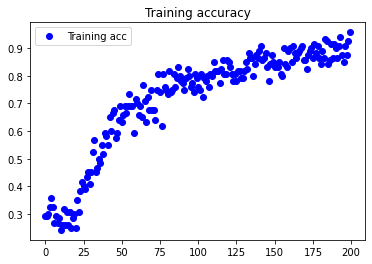

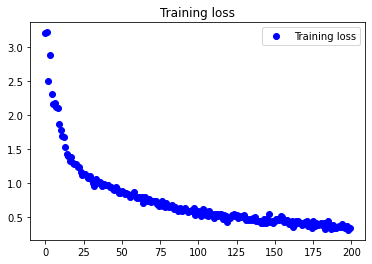

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()